<a href="https://colab.research.google.com/github/MikhailKuklin/time-series-analysis-forecasting/blob/main/notebooks/05_ts_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prophet is Facebook forecasting library

* additive model with the following components:
    * yearly using Fourier series
    * weekly using dummy variables
    * user-provided list of important holidays
* automatically detect changes in trend




In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries

from prophet import Prophet
import pandas as pd

In [ ]:
# download data

df = pd.read_csv('espoo_2020_2022.csv',
                 parse_dates= {"date" : ["Year","m","d"]})


df.dropna(axis=0,inplace=True)

df = df.groupby(['date']).mean()

df.index.freq = "D"

df = df.reset_index()

df.columns = ['ds','y']

df.head()

,ds,y
0,2020-01-01,1.991667
1,2020-01-02,4.129167
2,2020-01-03,4.754167
3,2020-01-04,2.120833
4,2020-01-05,-1.712500


In [ ]:
df.tail()

,ds,y
728,2021-12-29,-3.625000
729,2021-12-30,-2.208333
730,2021-12-31,0.091667
731,2022-01-01,-5.354167
732,2022-01-02,-10.500000


In [ ]:
len(df)

733

In [ ]:
# split into train and test sets

train = df.iloc[:723]
test = df.iloc[723:]

In [ ]:
len(test)

30

In [ ]:
# fit the model
#m = Prophet(changepoint_prior_scale=0.5,seasonality_mode='multiplicative')

#m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode='multiplicative')

m = Prophet()

m.fit(train)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/1mm7jgng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/52vlr10t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98967', 'data', 'file=/tmp/tmpqvpo_wf5/1mm7jgng.json', 'init=/tmp/tmpqvpo_wf5/52vlr10t.json', 'output', 'file=/tmp/tmpsrb80tz0/prophet_model-20220809130026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:00:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


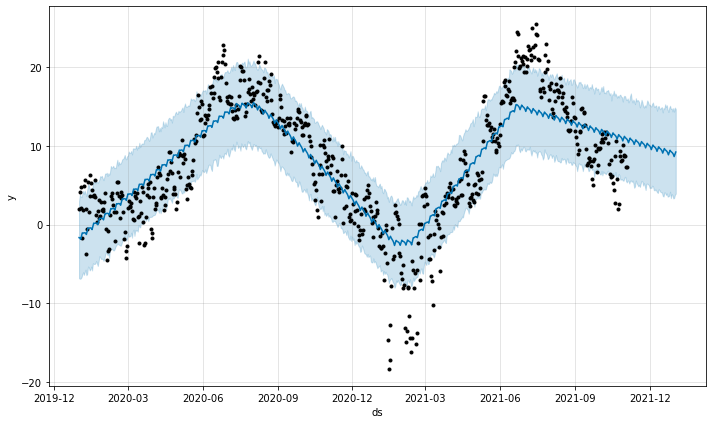

In [ ]:
# forecasting

future = m.make_future_dataframe(periods=60,freq='D')

forecast = m.predict(future)

m.plot(forecast);

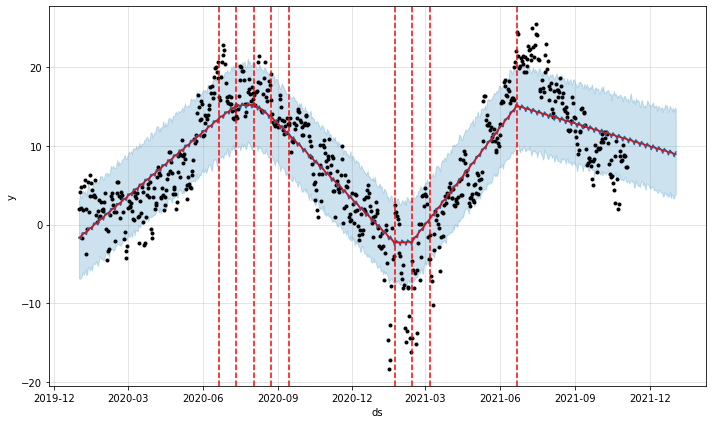

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

sqrt(mean_squared_error(test['y'],forecast['yhat'][673:]))

13.998855682176782

In [ ]:
test.head()

,ds,y
1800,2021-12-06,-14.904167
1801,2021-12-07,-16.091667
1802,2021-12-08,-15.845833
1803,2021-12-09,-7.875000
1804,2021-12-10,-2.691667


In [ ]:
test.tail()

,ds,y
1823,2021-12-29,-4.729167
1824,2021-12-30,-3.050000
1825,2021-12-31,-0.966667
1826,2022-01-01,-6.741667
1827,2022-01-02,-11.500000


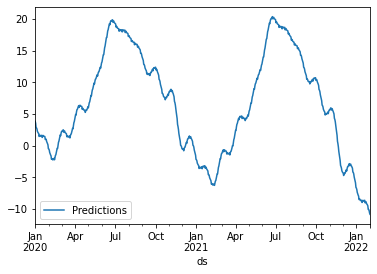

In [ ]:
forecast.plot(x='ds',y='yhat',label='Predictions')

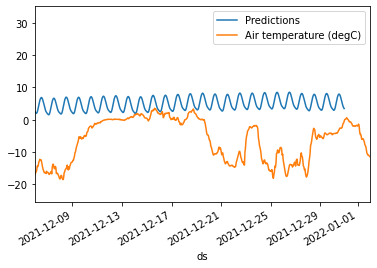

In [ ]:
ax=forecast.plot(x='ds',y='yhat',label='Predictions')
test.plot(x='ds',y='y',label='Air temperature (degC)',ax=ax,legend=True,xlim=('2021-12-06','2022-01-02'));

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

sqrt(mean_squared_error(df['y'],forecast['yhat'][:733]))

3.2112733591212668

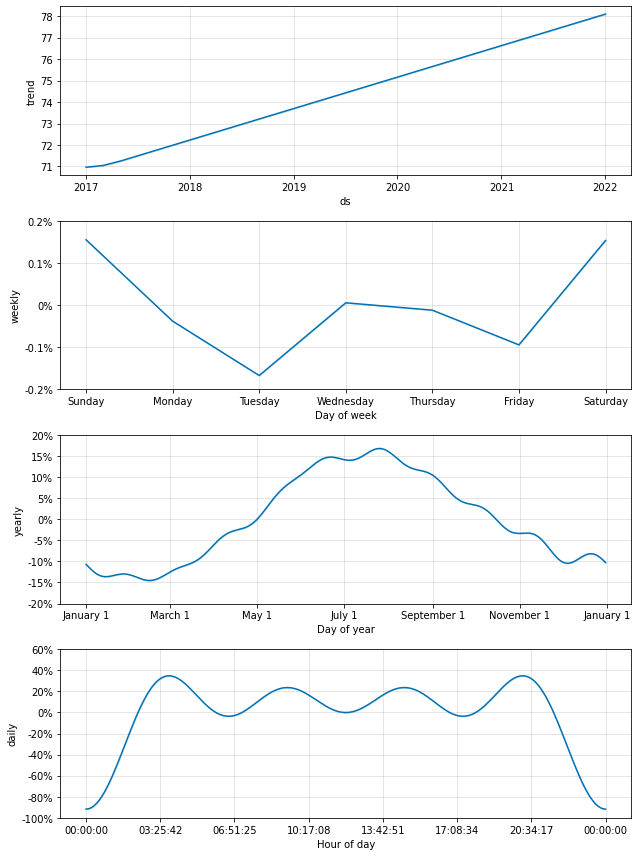

In [ ]:
m.plot_components(forecast);

In [ ]:
# evaluation

from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-11795:]['yhat']

rmse(predictions,test['y'])

30.182096356493822

In [ ]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y    5.573285
dtype: float64

In [ ]:
# model diagnostics

from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

# Initial 5 years training period
initial = 65
initial = str(initial) + ' days'
# Fold every year
period = 365
period = str(period) + ' days'
# Forecast 0.5 year into the future
horizon = 365/2
horizon = str(horizon) + ' days'

In [ ]:
# CV

df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2020-05-31 12:00:00 and 2021-05-31 12:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/324j_ala.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/qfkuu7sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3233', 'data', 'file=/tmp/tmpqvpo_wf5/324j_ala.json', 'init=/tmp/tmpqvpo_wf5/qfkuu7sy.json', 'output', 'file=/tmp/tmpb7tzgzf_/prophet_model-20220809110901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/1v4pdehb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/jj4gc4en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packa

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-01,10.070832,6.494297,13.890518,11.337500,2020-05-31 12:00:00
1,2020-06-02,10.368984,6.821185,13.928324,11.470833,2020-05-31 12:00:00
2,2020-06-03,10.705418,7.328946,14.088214,12.929167,2020-05-31 12:00:00
3,2020-06-04,10.369353,7.036329,13.842960,13.950000,2020-05-31 12:00:00
4,2020-06-05,9.577429,6.335780,13.096740,13.770833,2020-05-31 12:00:00


In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,17 days 12:00:00,33.640559,5.800048,5.451590,0.326100,0.341322,0.395918,0.277778
1,18 days 12:00:00,38.253528,6.184944,5.855317,0.341729,0.352245,0.417915,0.222222
2,19 days 12:00:00,41.510329,6.442851,6.142994,0.352096,0.361930,0.432057,0.194444
3,20 days 12:00:00,45.080018,6.714166,6.368253,0.357491,0.361930,0.440167,0.166667
4,21 days 12:00:00,47.994917,6.927836,6.528635,0.359349,0.361930,0.443547,0.166667
...,...,...,...,...,...,...,...,...
161,178 days 12:00:00,622.868207,24.957328,24.719456,57.263516,5.327301,1.541198,0.000000
162,179 days 12:00:00,645.108711,25.398990,25.087488,26.425915,5.352065,1.553051,0.000000
163,180 days 12:00:00,672.820064,25.938775,25.571571,26.276590,5.581402,1.576289,0.000000
164,181 days 12:00:00,703.607729,26.525605,26.122816,27.898046,5.813347,1.611605,0.000000


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


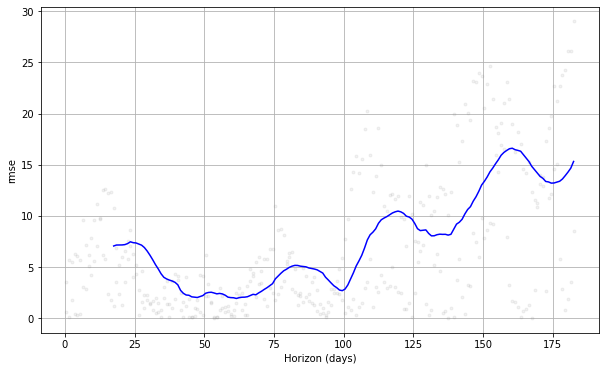

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');